A cylindrical fuel rod of radius R is cooled by fluid around it, with heat transfer coefficient h. Consider
the rod to be infinite in the z direction. The bulk coolant temperature is Tb0. The fuel element is made
of UO2 (R = 0.5 cm). [Density = 10.75 g/cm3; k = 2 W/(m‐K); Cp = 84 J/(mol‐K)]. Pay attention to the
units.

$$
\dot{q}(t) = \frac{\dot{q}_{0}}{2}(1 + e^{- \eta t})
$$

$$
\dot{T}_{b}(t) = \frac{T_{b0}}{2}(1 + e^{- m t})
$$

## B. NUMERICAL SOLUTION

Now, solve the problem numerically using a finite difference scheme (central difference for space, and explicit
in time). Show your work and include your computer code in an Appendix.

### (a) For the numerical solution obtained using an explicit finite difference method (for m = η = 0.02)

(i) Carry out a systematic study of the effects of the grid size and the time step on the accuracy of the solution. Devise a strategy to convince the reader that the number of grid points you are using is adequate but not an overkill. Implement the strategy and report your results. [Carry out a mesh refinement study to determine an adequate grid size.]

(ii) Also, convince the reader that the time step you used for each solution is small enough but not
unnecessarily small. [Carry out a time step refinement study to determine adequate time steps for
each simulation.]

(iii) Plot the converged analytical and numerical solutions for each ti and compare them.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
''' 
define given parameters
'''
r = 0.5 # radius of fuel [cm]
rho = 10.75 # density of fuel [g/cm^3]
k = 0.02 # thermal conductivity of fuel [W/cm-K]
cp = 84 * 1/270.03 # specific heat of fuel [J/g-K]

# heat generation rate [W/cm^3]
def q(q0, tau, t):
    return q0 * 1/2 * (1 + np.exp(-tau * t))

# bulk temperature [k]
def Tb(Tb0, m, t):
    return Tb0 * (1 + np.exp(-m * t)) * 1/2

q0 = 62.88 # [W/cm^3]
h = 4.5 # [W/cm^2-K]
Tb0 = 300 # [K]

tau, m = 0.02, 0.02

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

t = np.linspace(0, 100, 1000)
ax[0].plot(t, q(q0, tau, t))
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Heat Generation Rate [W/cm^3]')
ax[0].grid(True)
ax[1].plot(t, Tb(Tb0, m, t))
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Bulk Temperature [K]')
ax[1].grid(True)

In [ ]:
# Now, solve the problem numerically using a finite difference scheme (central difference for space, and explicit in time).
# We want to study the characteristics of the numerical solution (grid independence, convergence, etc).
# For the numerical solution obtained using an explicit finite difference method (for m = η = 0.02)
# Carry out a systematic study of the effects of the grid size and the time step on the accuracy of the solution. Devise a strategy to convince the reader that the number of grid points you are using is adequate but not an overkill. Implement the strategy and report your results. [Carry out a mesh refinement study to determine an adequate grid size.]

Nr=20: RMSE=3.8545956436449353, MAE=2.0213696217635375, dr=0.0250, dt=0.0002
Nr=40: RMSE=1.4905705947955457, MAE=0.748315178353208, dr=0.0125, dt=0.0002
Nr=80: RMSE=0.641861799871003, MAE=0.3148527270021289, dr=0.0063, dt=0.0002
Nr=100: RMSE=0.1262803766298584, MAE=0.06156431239134683, dr=0.0050, dt=0.0002
Nr=200: RMSE=0.23285269495339048, MAE=0.11258194135605004, dr=0.0025, dt=0.0002
Nr=300: RMSE=0.07588766308761401, MAE=0.03654487487619785, dr=0.0017, dt=0.0002
Nr=310: RMSE=0.005387683418273673, MAE=0.002614231883464111, dr=0.0016, dt=0.0002
Stopping calculation: Nr=310 meets the convergence criteria.


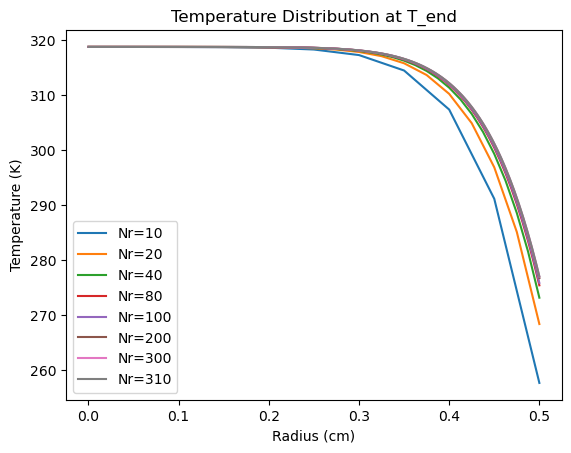

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Given parameters
r = 0.5  # radius of fuel [cm]
rho = 10.75  # density of fuel [g/cm^3]
k = 0.02  # thermal conductivity of fuel [W/cm-K]
cp = 84 / 270.03  # specific heat of fuel [J/g-K]
q0 = 62.88  # heat generation rate [W/cm^3]
h = 4.5  # convection coefficient [W/cm^2-K]
Tb0 = 300  # initial bulk temperature [K]
eta, m = 0.02, 0.02  # parameters
initial_cylinder_temp = 300  # initial cylinder temperature [K]

# Heat generation rate function
def q(t):
    return q0 * 0.5 * (1 + np.exp(-eta * t))

# Bulk temperature function
def Tb(t):
    return Tb0 * 0.5 * (1 + np.exp(-m * t))

# Finite difference solution
def solve_heat_equation(Nr, Nt, T_end):
    dr = r / Nr
    dt = T_end / Nt
    r_values = np.linspace(0, r, Nr + 1)
    t_values = np.linspace(0, T_end, Nt + 1)

    T = np.full((Nr + 1, Nt + 1), initial_cylinder_temp, dtype=np.float64)

    for n in range(0, Nt):
        for i in range(1, Nr):
            T[i, n + 1] = T[i, n] + dt * (
                k / (rho * cp) * ((T[i + 1, n] - 2 * T[i, n] + T[i - 1, n]) / dr**2 + 1 / r_values[i] * (T[i + 1, n] - T[i - 1, n]) / (2 * dr)) + 
                q(t_values[n]) / (rho * cp)
            )

        T[0, n + 1] = T[1, n + 1]
        T[Nr, n + 1] = T[Nr - 1, n + 1] + dr * h / k * (Tb(t_values[n + 1]) - T[Nr, n + 1])

    return r_values, t_values, T, dr, dt

# Error metric functions
def rmse(T1, r1, T2, r2):
    interpolate_T1 = interp1d(r1, T1, kind='linear', fill_value="extrapolate")
    T1_interpolated = interpolate_T1(r2)
    return np.sqrt(np.mean((T1_interpolated - T2) ** 2))

def mae(T1, r1, T2, r2):
    interpolate_T1 = interp1d(r1, T1, kind='linear', fill_value="extrapolate")
    T1_interpolated = interpolate_T1(r2)
    return np.mean(np.abs(T1_interpolated - T2))

# Mesh refinement study with error metrics and conditional stopping
def mesh_refinement_study(Nr_values=None, Nt=5000, T_end=1, limit=0.01):
    ''' 
    Nr_values : Different grid sizes
    Nt = 5000 (default): Number of time steps
    T_end = 1 (default): End time
    limit = 0.01 (default): Convergence criteria
    '''

    previous_T = None
    previous_r_values = None
    for Nr in Nr_values:
        r_values, t_values, T, dr, dt = solve_heat_equation(Nr, Nt, T_end)
        plt.plot(r_values, T[:, -1], label=f'Nr={Nr}')

        if previous_T is not None:
            diff_rmse = rmse(previous_T[:, -1], previous_r_values, T[:, -1], r_values)
            diff_mae = mae(previous_T[:, -1], previous_r_values, T[:, -1], r_values)
            print(f'Nr={Nr}: RMSE={diff_rmse}, MAE={diff_mae}, dr={dr:.4f}, dt={dt:.4f}')

            # Check if both RMSE and MAE are less than 0.01
            if diff_rmse < limit and diff_mae < limit:
                print(f"Stopping calculation: Nr={Nr} meets the convergence criteria.")
                break

        previous_T = T
        previous_r_values = r_values

    plt.xlabel('Radius (cm)')
    plt.ylabel('Temperature (K)')
    plt.title('Temperature Distribution at T_end')
    plt.legend()
    plt.show()

mesh_refinement_study(Nr_values = [10, 20, 40, 80, 100, 200, 300, 310, 320, 330], Nt=5000, T_end=1, limit=0.01)
